In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame

from numpy import dstack

import copy

import os
from glob import glob

from path import Path

from numpy import mean
from numpy import std

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import SimpleRNN

from keras.layers import Bidirectional

from keras.utils.vis_utils import plot_model

from keras.callbacks import EarlyStopping

from keras.optimizers import Adam

import keras.backend as K

import random

from sklearn.model_selection import train_test_split

from matplotlib import pyplot

Using TensorFlow backend.


CPU times: user 1.7 s, sys: 421 ms, total: 2.12 s
Wall time: 1.81 s


In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Load Data

In [3]:
%%time
from helpers.classes.data_loader import DataLoader

root_path = "/home/ubuntu/pose-estimation-jupyter/augmented-keypoints-339"

sample_dir_names = [n for n in os.listdir(root_path) if os.path.isdir(f"{root_path}/{n}")]


samples = DataLoader.get_samples_list(sample_dir_names, root_path)

y_labels = DataLoader.get_y_labels(sample_dir_names) # classifier labels, where 0 = backflip and 1 = flack

Loading frames for 0/339
Loading frames for 1/339
Loading frames for 2/339
Loading frames for 3/339
Loading frames for 4/339
Loading frames for 5/339
Loading frames for 6/339
Loading frames for 7/339
Loading frames for 8/339
Loading frames for 9/339
Loading frames for 10/339
Loading frames for 11/339
Loading frames for 12/339
Loading frames for 13/339
Loading frames for 14/339
Loading frames for 15/339
Loading frames for 16/339
Loading frames for 17/339
Loading frames for 18/339
Loading frames for 19/339
Loading frames for 20/339
Loading frames for 21/339
Loading frames for 22/339
Loading frames for 23/339
Loading frames for 24/339
Loading frames for 25/339
Loading frames for 26/339
Loading frames for 27/339
Loading frames for 28/339
Loading frames for 29/339
Loading frames for 30/339
Loading frames for 31/339
Loading frames for 32/339
Loading frames for 33/339
Loading frames for 34/339
Loading frames for 35/339
Loading frames for 36/339
Loading frames for 37/339
Loading frames for 38/

Loading frames for 308/339
Loading frames for 309/339
Loading frames for 310/339
Loading frames for 311/339
Loading frames for 312/339
Loading frames for 313/339
Loading frames for 314/339
Loading frames for 315/339
Loading frames for 316/339
Loading frames for 317/339
Loading frames for 318/339
Loading frames for 319/339
Loading frames for 320/339
Loading frames for 321/339
Loading frames for 322/339
Loading frames for 323/339
Loading frames for 324/339
Loading frames for 325/339
Loading frames for 326/339
Loading frames for 327/339
Loading frames for 328/339
Loading frames for 329/339
Loading frames for 330/339
Loading frames for 331/339
Loading frames for 332/339
Loading frames for 333/339
Loading frames for 334/339
Loading frames for 335/339
Loading frames for 336/339
Loading frames for 337/339
Loading frames for 338/339
CPU times: user 1min 10s, sys: 887 ms, total: 1min 11s
Wall time: 1min 10s


In [76]:
sample_dir_names_backflips = [n for n in os.listdir(root_path) if os.path.isdir(f"{root_path}/{n}") and "backflip" in n]
samples_backflips = DataLoader.get_samples_list(sample_dir_names_backflips, root_path)
padded_samples_list_backflips = Padder.get_padded_samples(samples_backflips)

padded_samples_ndarray_backflips = np.asarray(padded_samples_list_backflips)

Loading frames for 0/153
Loading frames for 1/153
Loading frames for 2/153
Loading frames for 3/153
Loading frames for 4/153
Loading frames for 5/153
Loading frames for 6/153
Loading frames for 7/153
Loading frames for 8/153
Loading frames for 9/153
Loading frames for 10/153
Loading frames for 11/153
Loading frames for 12/153
Loading frames for 13/153
Loading frames for 14/153
Loading frames for 15/153
Loading frames for 16/153
Loading frames for 17/153
Loading frames for 18/153
Loading frames for 19/153
Loading frames for 20/153
Loading frames for 21/153
Loading frames for 22/153
Loading frames for 23/153
Loading frames for 24/153
Loading frames for 25/153
Loading frames for 26/153
Loading frames for 27/153
Loading frames for 28/153
Loading frames for 29/153
Loading frames for 30/153
Loading frames for 31/153
Loading frames for 32/153
Loading frames for 33/153
Loading frames for 34/153
Loading frames for 35/153
Loading frames for 36/153
Loading frames for 37/153
Loading frames for 38/

In [79]:
sample_dir_names_flacks = [n for n in os.listdir(root_path) if os.path.isdir(f"{root_path}/{n}") and "flack" in n]
samples_flacks = DataLoader.get_samples_list(sample_dir_names_flacks, root_path)
padded_samples_list_flacks = Padder.get_padded_samples(samples_flacks)

padded_samples_ndarray_flacks = np.asarray(padded_samples_list_flacks)

Loading frames for 0/186
Loading frames for 1/186
Loading frames for 2/186
Loading frames for 3/186
Loading frames for 4/186
Loading frames for 5/186
Loading frames for 6/186
Loading frames for 7/186
Loading frames for 8/186
Loading frames for 9/186
Loading frames for 10/186
Loading frames for 11/186
Loading frames for 12/186
Loading frames for 13/186
Loading frames for 14/186
Loading frames for 15/186
Loading frames for 16/186
Loading frames for 17/186
Loading frames for 18/186
Loading frames for 19/186
Loading frames for 20/186
Loading frames for 21/186
Loading frames for 22/186
Loading frames for 23/186
Loading frames for 24/186
Loading frames for 25/186
Loading frames for 26/186
Loading frames for 27/186
Loading frames for 28/186
Loading frames for 29/186
Loading frames for 30/186
Loading frames for 31/186
Loading frames for 32/186
Loading frames for 33/186
Loading frames for 34/186
Loading frames for 35/186
Loading frames for 36/186
Loading frames for 37/186
Loading frames for 38/

In [4]:
i = 5

# Print some sample dir names
a = [print(sample_dir_name) for sdn_i, sample_dir_name in enumerate(sample_dir_names) if sdn_i < i]
a = [print(y_label) for y_i, y_label in enumerate(y_labels) if y_i < i]

backflip-33-mario-aug-2
backflip-46-dagne-aug-1
backflip-63-allar-aug-1
backflip-47-dagne-aug-1
flack-56-martin-aug-0
0
0
0
0
1


## Data padding

In [5]:
%%time
from helpers.classes.padder import Padder

padded_samples_list = Padder.get_padded_samples(samples)
categorical_y_labels = DataLoader.get_categorical_y_labels(y_labels)

padded_samples_ndarray = np.asarray(padded_samples_list)
categorical_y_labels_ndarray = np.asarray(categorical_y_labels)

y_labels_stacked shape: (1, 1, 339)
y_labels_categorical shape: (1, 1, 339, 2)
y_labels_squeezed shape (339, 2)
y_label categorical: [1.0, 0.0]
y_label categorical: [1.0, 0.0]
y_label categorical: [1.0, 0.0]
y_label categorical: [1.0, 0.0]
y_label categorical: [0.0, 1.0]
CPU times: user 3.4 s, sys: 27.9 ms, total: 3.42 s
Wall time: 3.41 s


## Build model

In [6]:
def get_simple_rnn_model(units, n_outputs, n_features, n_timesteps):
    optimizer = Adam(lr=0.001)
    
    input_shape = (n_timesteps, n_features)
    print(f"Model input shape {input_shape}")
        
    model = Sequential()
    model.add(SimpleRNN(units, 
                        return_sequences=True,
                        input_shape=input_shape))
    model.add(Dropout(0.8))
    model.add(Dense(units, activation='relu'))
    model.add(Flatten())
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs = 1, 5
        
    lstm_units = 2

    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    
    model = get_simple_rnn_model(lstm_units, n_outputs, n_features, n_timesteps)
    
    print(model.summary())
    
    batch_size = 1
    
    es_callback = EarlyStopping(monitor='val_loss',
                                patience=3)
    
    history = model.fit(trainX,
                        trainy,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=verbose,
                        validation_split=0.33,
                        callbacks=[es_callback]
                       )
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    
    # fit network
    #model.fit_generator(train_generator(trainX, trainy), steps_per_epoch=n_steps_per_epoch, epochs=epochs, verbose=verbose)
    # evaluate model
    #_, accuracy = model.evaluate_generator(train_generator(testX, testy), steps=len(testX), verbose=0)
    
    return history, accuracy, model

In [7]:
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Test accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [8]:
def save_model(model, repeat):
    # serialize model to JSON
    model_json = model.to_json()
    with open(f"model-output/model-{repeat}.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"model-output/model-{repeat}.h5")
    
    plot_model(model, to_file=f"model-output/model-plot-{repeat}.png", show_shapes=True, show_layer_names=True)
    
    print("Saved model to disk")

## Run experiment

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_samples_ndarray,
                                                    categorical_y_labels_ndarray,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"X train len: {len(X_train)}, y train len:{len(y_train)} --- X test len:{len(X_test)}, y test len:{len(y_test)}")

train_loss_history = DataFrame()
val_loss_history = DataFrame()

train_accuracy_history = DataFrame()
val_accuracy_history = DataFrame()

model_history = []

# run an experiment
def run_experiment(repeats=5):
    # repeat experiment
    scores = list()
    last_history = None
    
    for r in range(repeats):
        history, score, model = evaluate_model(X_train, y_train, X_test, y_test)
        
        model_history.append(model)
        save_model(model, r)
        
        # story history
        train_loss_history[str(r)] = history.history['loss']
        val_loss_history[str(r)] = history.history['val_loss']
        train_accuracy_history[str(r)] = history.history['accuracy']
        val_accuracy_history[str(r)] = history.history['val_accuracy']
        
        score = score * 100.0
        print('>#%d test accuracy: %.3f' % (r+1, score))
        scores.append(score)
        
    # summarize results
    summarize_results(scores)

X train len: 271, y train len:271 --- X test len:68, y test len:68


In [10]:
%%time
run_experiment()

Model input shape (110, 30)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 110, 2)            66        
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 2)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 110, 2)            6         
_________________________________________________________________
flatten_1 (Flatten)          (None, 220)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 442       
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________
None
Train on 181 samples, validate on 90 samples
Epoch 1/5
181/181 [=========================

Train on 181 samples, validate on 90 samples
Epoch 1/5
181/181 [==============================] - 11s 60ms/step - loss: 1.0097 - accuracy: 0.6409 - val_loss: 0.4497 - val_accuracy: 0.7889
Epoch 2/5
181/181 [==============================] - 10s 58ms/step - loss: 0.7610 - accuracy: 0.6906 - val_loss: 0.3118 - val_accuracy: 0.9667
Epoch 3/5
181/181 [==============================] - 10s 58ms/step - loss: 0.5394 - accuracy: 0.7459 - val_loss: 0.2037 - val_accuracy: 0.9889
Epoch 4/5
181/181 [==============================] - 10s 58ms/step - loss: 0.3751 - accuracy: 0.8287 - val_loss: 0.1528 - val_accuracy: 1.0000
Epoch 5/5
181/181 [==============================] - 10s 58ms/step - loss: 0.2807 - accuracy: 0.9171 - val_loss: 0.1057 - val_accuracy: 1.0000
Saved model to disk
>#5 test accuracy: 100.000
[83.82353186607361, 92.64705777168274, 69.11764740943909, 98.52941036224365, 100.0]
Test accuracy: 88.824% (+/-11.376)
CPU times: user 9min 40s, sys: 1min 43s, total: 11min 23s
Wall time: 4min 

## Gradients

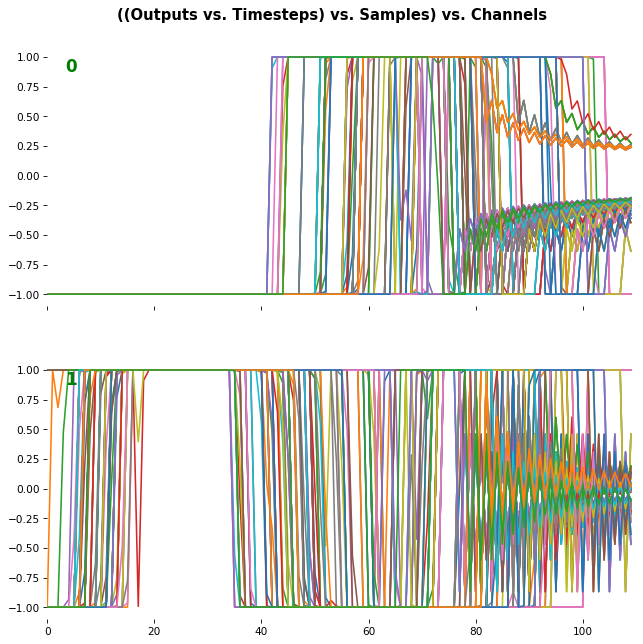

In [95]:
from see_rnn import get_gradients, get_outputs, get_rnn_weights
from see_rnn import features_0D, features_1D, features_2D
from see_rnn import rnn_heatmap, rnn_histogram


x = padded_samples_ndarray_backflips


def viz_outs(model, idx=1):
    outs = get_outputs(model, idx, x)
    
    features_1D(outs, n_rows=2, show_borders=False)
    #features_2D(outs,     n_rows=8, norm=(-1,1))
    
model = model_history[1]

viz_outs(model, 1)
#viz_outs_grads(model, 1)

#data = get_rnn_weights(model, 1)
#viz_prefetched_data(model, data, 1)

## Plots

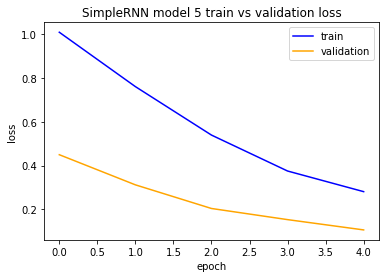

In [89]:
model_num = '4'
model_num_for_fig = int(model_num) + 1

pyplot.plot(train_loss_history[model_num], color='blue', label='train')
pyplot.plot(val_loss_history[model_num], color='orange', label='validation')
pyplot.title(f"SimpleRNN model {model_num_for_fig} train vs validation loss")
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
#pyplot.show()

fig_name = f"model-output/model-{model_num_for_fig}-train-vs-validation-loss.png"
pyplot.savefig(fig_name)

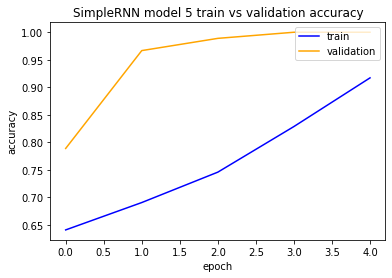

In [90]:
pyplot.plot(train_accuracy_history[model_num], color='blue', label='train')
pyplot.plot(val_accuracy_history[model_num], color='orange', label='validation')
pyplot.title(f"SimpleRNN model {model_num_for_fig} train vs validation accuracy")
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
#pyplot.show()

fig_name = f"model-output/model-{model_num_for_fig}-train-vs-validation-accuracy.png"
pyplot.savefig(fig_name)

## Sample

In [ ]:
example_sample_idx = 89
model_history_idx = 1

example_sample_dir_name = sample_dir_names[example_sample_idx]
example_sample = padded_samples_ndarray[example_sample_idx]
example_model = model_history[model_history_idx]

## Predictions

In [ ]:
def predictions(loaded_model, samples, sample_dir_names, y_labels):
    ynew = loaded_model.predict_classes(samples)
    # show the inputs and predicted outputs
    for i in range(len(samples)):
        pred_y = ynew[i]
        actual_y = y_labels[i]
    
        same = False
        if pred_y == actual_y:
            same = True
    
        print("Name=%s, X=%s, Predicted=%s, Actual=%s, same=%s" % (sample_dir_names[i], i, pred_y, actual_y, same))
    
predictions(example_model, padded_samples_ndarray, sample_dir_names, y_labels)

## Activation

In [ ]:
layer_names = [layer.name for layer in example_model.layers]

print(example_sample_dir_name)
print(example_sample.shape)
print(layer_names)

def activations(model, example_sample): 
    n_timesteps, n_features = example_sample.shape[0], example_sample.shape[1]
    
    print(f"n_timesteps: {n_timesteps}, n_features: {n_features}")
    
    x = np.zeros((1, n_timesteps, n_features))
    
    for t, timestep in enumerate(example_sample):
        for f, feature in enumerate(timestep):
            x[0, t, f] = example_sample[t][f]
                
    output = model.get_layer('simple_rnn_2').output
    
    f = K.function([model.input], [output])
    
    return f([x])[0][0]


act = activations(model_history[model_history_idx], example_sample)
print(act)
act.shape

In [ ]:
from io import BytesIO
from PIL import Image as PILImage
from PIL import ImageDraw
from IPython.display import Image

def get_image(img, n_timesteps, img_idx, cell_size=48):
    img_width = n_timesteps * 25
    cell_size = int(img_width / n_timesteps)
    
    pil_image = PILImage.fromarray(img.astype(np.uint8))
    
    resized_pil_image = pil_image.resize((img_width, cell_size))
    #resized_pil_image = pil_image
    
    draw = ImageDraw.Draw(resized_pil_image)
    
    for n_timestep in range(n_timesteps):
        text = str((img_idx * 30) + n_timestep)
        xy = (n_timestep * cell_size, 0)
        
        draw.text(xy, text)
        
    f = BytesIO()
    resized_pil_image.save(f, 'png')
    return Image(data=f.getvalue())

def visualize_neurons(act, cell_size=48):
    n_neurons = act.shape[1]
    n_timesteps = act.shape[0]
    
    fill_value = 128
    
    img = np.full((n_neurons + 1, n_timesteps, 3), fill_value)
    
    # add 1 to each value in matrix and then divide by 2
    scores = (act[:, :].T + 1) / 2
    
    img[1:, :, 0] = 255 * (1 - scores)
    img[1:, :, 1] = 255 * scores

    first_hs_img = img[:, :30, :]
    second_hs_img = img[:, 30:60, :]
    third_hs_img = img[:, 60:90, :]
    fourth_hs_img = img[:, 90:, :]
    
    imgs = [first_hs_img,
            second_hs_img,
            third_hs_img,
            fourth_hs_img]
    
    actual_imgs = []
    for i, img in enumerate(imgs):
        n_img_timesteps = img.shape[1]
        
        actual_imgs.append(get_image(img, n_img_timesteps, i))
    
    return actual_imgs

example_sample_imgs = visualize_neurons(act)

for img in example_sample_imgs:
    display(img)